# This jupyter notebook is prepared by “Santiago Acosta Cano”.

# 1. Load Data and perform basic EDA (4pts total)

### 1.1 import libraries: numpy, pandas, matplotlib.pyplot, seaborn, sklearn (1pt)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1.2 Upload the dataset to your Google Drive, then using the following code, import the data to a pandas dataframe and show the count of rows and columns (0.5pt)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving hr_data_.csv to hr_data_ (1).csv


In [ ]:
df = pd.read_csv("hr_data_.csv")
print(df.shape)

(8955, 15)


### 1.3 Show the top 7 and bottom 7 rows (0.5pt)

In [ ]:
# TODO
print(df.head(7))
print(df.tail(7))

   Unnamed: 0  enrollee_id      city  city_development_index gender  \
0           1        29725   city_40                   0.776   Male   
1           4          666  city_162                   0.767   Male   
2           7          402   city_46                   0.762   Male   
3           8        27107  city_103                   0.920   Male   
4          11        23853  city_103                   0.920   Male   
5          12        25619   city_61                   0.913   Male   
6          15         6588  city_114                   0.926   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment        Graduate   
5  Has relevent experience       no

### 1.4 Show if any column has null values (0.5pt)

In [ ]:
# TODO
df.isna().sum()

Unnamed: 0                0
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### 1.5 Show/Plot the count of unique target labels and discuss its imbalances and possible issues in using it for classification. (1.5pt)

Unnamed: 0                  int64
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


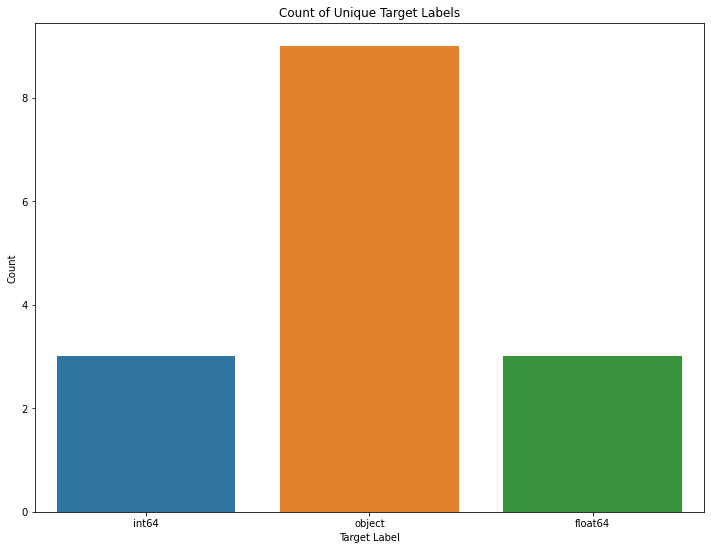

In [ ]:

print(df.dtypes)
plt.rcParams['figure.figsize'] = (12.0,9.0)

sns.countplot(x=df.dtypes, data=df)
plt.title('Count of Unique Target Labels')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.show()

Upon examining the previous chart, it is evident that the numerical features amount to a mere six in total, with the remainder being object text that requires conversion into a more computationally tractable format.

However, a significant drawback of having only six features to input into the model is the risk of underfitting. Given that the total number of features is 14, we are utilizing a mere 40% of the available data, which could lead to the exclusion of crucial features.

# 2. Feature Selection and Pre-processing (25 pts total)

## 2.1 Preprocessing City (1+1+1+1 = 4pts total)

### 2.1.1 Plot no. of records per city so that the highest city counts are shown in descending order (1pt)

In [ ]:
# TODO
counts = df['city'].value_counts()
print(counts)

city_103    2426
city_21     1111
city_16      836
city_114     648
city_160     401
            ... 
city_127       1
city_107       1
city_62        1
city_109       1
city_25        1
Name: city, Length: 116, dtype: int64


### 2.1.2 How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (1pt)

In [ ]:
# TODO
print("The top 4 cities has a total of : ",counts[0:3].sum())
print("The remaining cities has a total of: ",counts[3:].sum())
print("Total rows are :", counts.sum())

The top 4 cities has a total of :  4373
The remaining cities has a total of:  4582
Total rows are : 8955


### 2.1.3 Replace the city name with city_others if the city name is not among the top 4 (1pt)

In [ ]:
# TODO top cities are 103, 21, 16, 114
top_cities = ['city_103','city_21','city_16','city_114']
df.loc[~df['city'].isin(top_cities), 'city'] = 'city_others'
print(df['city'].head())

0    city_others
1    city_others
2    city_others
3       city_103
4       city_103
Name: city, dtype: object


### 2.1.4 Show some sample data that the records have changed correctly. (1pt)

In [ ]:
# TODO
print(df['city'].head(10))
print(df['city'].tail(10))

0    city_others
1    city_others
2    city_others
3       city_103
4       city_103
5    city_others
6       city_114
7    city_others
8       city_114
9    city_others
Name: city, dtype: object
8945    city_others
8946    city_others
8947    city_others
8948       city_103
8949       city_103
8950        city_21
8951       city_103
8952    city_others
8953       city_103
8954       city_103
Name: city, dtype: object


## 2.2. Preprocessing Education Level (1+2+2+1 = 6pts total)

### 2.2.1. Show the unique values of education level. (1pt)

0       Graduate
1        Masters
2       Graduate
3       Graduate
4       Graduate
          ...   
8950    Graduate
8951     Masters
8952    Graduate
8953    Graduate
8954    Graduate
Name: education_level, Length: 8955, dtype: object


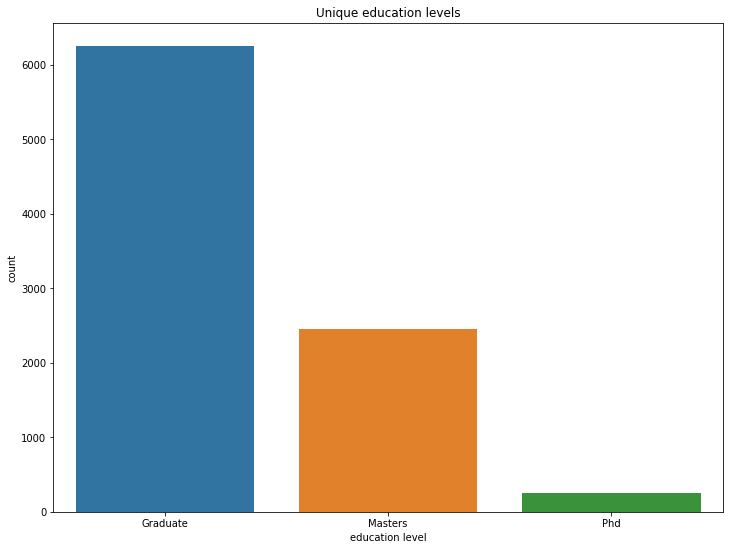

In [ ]:
# TODO
print(df['education_level'])
sns.countplot(x=df["education_level"], data=df['education_level'])
plt.title("Unique education levels")
plt.xlabel("education level")
plt.ylabel("count")
plt.show()

### 2.2.2. Write a function named replace_labels() that can replace labels using given {old_label:new_label} dictionary (2pts)

Parameters: (1) dataframe, (2) a column name, (3) a dictionary with {old_label:new_label} mapping. 

Returns: a dataframe with specified column values replaced with the  


In [ ]:
# TODO
def replace_labels(df, col_name, label_dict):

    df_copy = df.copy()  # Make a copy of the input DataFrame to avoid modifying it directly
    df_copy[col_name] = df_copy[col_name].replace(label_dict)  # Use the replace() method of the column to replace values
    return df_copy

### 2.2.3. Using the replace_labels() function you just created, replace education_level column with ordinal values. The mapping can be like "Graduate":0, "Masters":1, "Phd":2 . (2pt)

In [ ]:
# TODO
replace_dic = {"Graduate":0,
               "Masters":1,
               "Phd":2}
df2 = replace_labels(df,'education_level',replace_dic)
print(df2["education_level"].head(10))

0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: education_level, dtype: int64


### 2.2.4 Show some sample data that the records have changed appropriately (1pt)

In [ ]:
# TODO
print(df2["education_level"].head())
print(df2["education_level"].tail())

0    0
1    1
2    0
3    0
4    0
Name: education_level, dtype: int64
8950    0
8951    1
8952    0
8953    0
8954    0
Name: education_level, dtype: int64


## 2.3. Preprocessing company_size (2+2+1 = 5pts total)

### 2.3.1 Show the unique values of the company_size column and their counts (2pt)

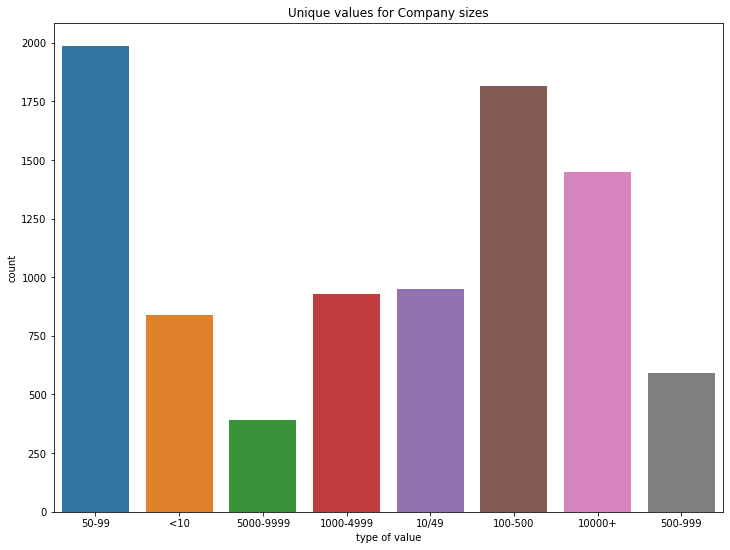

In [ ]:
# TODO
sns.countplot(x=df["company_size"], data=df['company_size'])
plt.title("Unique values for Company sizes")
plt.xlabel("type of value")
plt.ylabel("count")
plt.show()

### 2.3.2 Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. (2pt)
(Hint: you can use the replace_labels() function you created before.)

In [ ]:
# TODO
replace_dic2 = {"<10":0,
                "10/49":1,
                "50-99":2,
                "100-500":3,
                "500-999":4,
                "1000-4999":5,
                "5000-9999":6,
                "10000+":7}
df2 = replace_labels(df2,'company_size',replace_dic2)


### 2.3.3 Show the updated unique values to validate they changed appropriately (1pt)

In [ ]:
# TODO
print(df2["company_size"].head(10))
print(df2["company_size"].tail(10))

0    2
1    2
2    0
3    2
4    6
5    5
6    1
7    3
8    3
9    5
Name: company_size, dtype: int64
8945    1
8946    2
8947    1
8948    7
8949    4
8950    3
8951    2
8952    3
8953    1
8954    2
Name: company_size, dtype: int64


## 2.4. Preprocessing last_new_job (1+2+1 = 4pts total)

### 2.4.1 Show unique values of the last_new_job column (1pt)

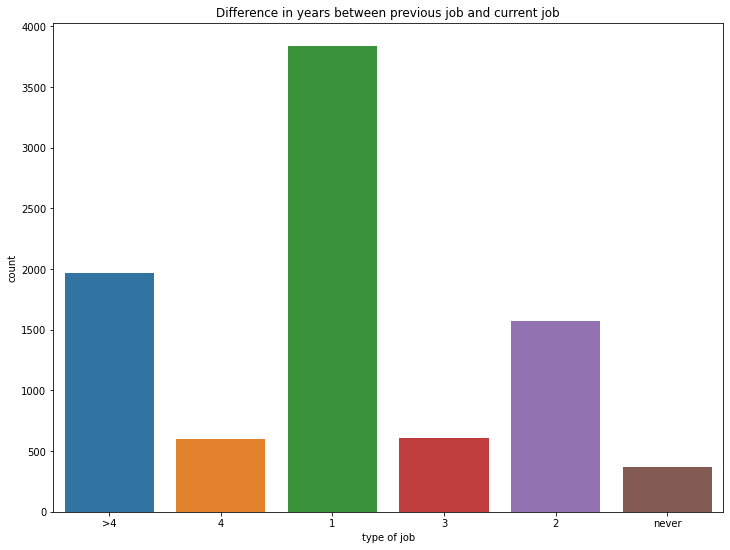

In [ ]:
# TODO
sns.countplot(x=df2["last_new_job"], data=df2['last_new_job'])
plt.title("Difference in years between previous job and current job")
plt.xlabel("type of job")
plt.ylabel("count")
plt.show()



```
# This is formatted as code
```

### 2.4.2 Convert the values of this column to never->0, 1->1,....>4 -->5 (2pt)
Hint: replace_labels()

In [ ]:
# TODO
replace_dict3 = {
    "never": 0,
    "1":1,
    "2":2,
    "3":3,
    "4":4,
    ">4":5
}
df2 = replace_labels(df2,'last_new_job',replace_dict3)

### 2.4.3 Show the updated values (1pt)

In [ ]:
# TODO
print(df2["last_new_job"].head(10))
print(df2["last_new_job"].tail(10))

0    4
1    3
2    4
3    0
4    0
5    2
6    4
7    0
8    1
9    0
Name: last_new_job, dtype: int64
8945    0
8946    1
8947    2
8948    4
8949    0
8950    0
8951    0
8952    2
8953    0
8954    3
Name: last_new_job, dtype: int64


## 2.5 Preprocessing other columns (2pt total)

### 2.5.1 Drop the enrollee_id, any unnamed columns, and any duplicate columns (if you created multiple columns one with original and one with updated, then remove the original one) (2pt)

In [ ]:
# TODO
#df2 = df2.drop(columns='enrollee_id',axis=1)
#df2 = df2.drop(columns='Unnamed: 0',axis=1)
print(df2.dtypes)

level_0                     int64
index                       int64
city                        int64
city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level             int64
major_discipline            int64
experience                float64
company_size                int64
company_type                int64
last_new_job                int64
training_hours            float64
target                    float64
dtype: object


## 2.6 Feature Scaling (3+1 = 4ps total)

### 2.6.1 Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the numeric columns (3pt)

In [ ]:
# TODO
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

#Selecting all the columns with the numeric values
num_df = df2.select_dtypes(include=np.number)
print(num_df.head())

   city_development_index  education_level  experience  company_size  \
0                   0.776                0        15.0             2   
1                   0.767                1        21.0             2   
2                   0.762                0        13.0             0   
3                   0.920                0         7.0             2   
4                   0.920                0         5.0             6   

   last_new_job  training_hours  target  
0             5              47     0.0  
1             4               8     0.0  
2             5              18     1.0  
3             1              46     1.0  
4             1             108     0.0  


In [ ]:
# TODO
#normalizing the data set 
scaler = MinMaxScaler()
df2[['city_development_index','education_level','experience','company_size','last_new_job','training_hours','target']] = scaler.fit_transform(num_df[['city_development_index','education_level','experience','company_size','last_new_job','training_hours','target']])
print(df2.head())

   level_0  index  city  city_development_index  gender  relevent_experience  \
0        0      0     4                0.654691       1                    1   
1        1      1     4                0.636727       1                    0   
2        2      2     4                0.626747       1                    0   
3        3      3     0                0.942116       1                    0   
4        4      4     0                0.942116       1                    0   

   enrolled_university  education_level  major_discipline  experience  \
0                    2              0.0                 5    0.714286   
1                    2              0.5                 5    1.000000   
2                    2              0.0                 5    0.619048   
3                    2              0.0                 5    0.333333   
4                    2              0.0                 5    0.238095   

   company_size  company_type  last_new_job  training_hours  target  
0      0.2

### 2.6.2 Show some of the scaled records. (1pt)

In [ ]:
# TODO
print(df2.head())

   level_0  index  city  city_development_index  gender  relevent_experience  \
0        0      0     4                0.654691       1                    1   
1        1      1     4                0.636727       1                    0   
2        2      2     4                0.626747       1                    0   
3        3      3     0                0.942116       1                    0   
4        4      4     0                0.942116       1                    0   

   enrolled_university  education_level  major_discipline  experience  \
0                    2              0.0                 5    0.714286   
1                    2              0.5                 5    1.000000   
2                    2              0.0                 5    0.619048   
3                    2              0.0                 5    0.333333   
4                    2              0.0                 5    0.238095   

   company_size  company_type  last_new_job  training_hours  target  
0      0.2

# 3. X/Y and Training/Test Split with stratified sampling (15pts in total)

### 3.1 Using a lot of features with categorical values is not memory-efficient. Use a LabelEncoder() to convert all the categorical columns to numeric labels. (This task is similar to previous assignment A1) (2pt)

In [ ]:
# TODO
for col in df.columns:
    if df[col].dtype == 'object':  # check if column contains strings
        le = LabelEncoder()
        df2[col] = le.fit_transform(df[col])

print(df2.head())
print(df2.dtypes)

   level_0  index  city  city_development_index  gender  relevent_experience  \
0        0      0     4                0.654691       1                    1   
1        1      1     4                0.636727       1                    0   
2        2      2     4                0.626747       1                    0   
3        3      3     0                0.942116       1                    0   
4        4      4     0                0.942116       1                    0   

   enrolled_university  education_level  major_discipline  experience  \
0                    2                0                 5    0.714286   
1                    2                1                 5    1.000000   
2                    2                0                 5    0.619048   
3                    2                0                 5    0.333333   
4                    2                0                 5    0.238095   

   company_size  company_type  last_new_job  training_hours  target  
0         

### 3.2 Copy all the features into X and the target to Y (2pt)

In [ ]:
# TODO
Y = df2['target']
X = df2[['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours']]
#print(X.head())
Y.shape

#X.shape
print(Y)

0       0.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
8950    1.0
8951    1.0
8952    0.0
8953    0.0
8954    0.0
Name: target, Length: 8955, dtype: float64


### 3.3 Show the ratio of 1 and 0 in Y. (1pt)

In [ ]:
# TODO
value_counts = Y.value_counts(normalize=True)
print(value_counts)

0.0    0.834394
1.0    0.165606
Name: target, dtype: float64


### 3.4 Use sklearn's train_test_split() to split the data set into 70% training and 30% test sets. Set random_state to 42. We want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to Y to ensure this. Then show the ratio of 1 and 0 in both train and test target. (4pt)

In [ ]:
# TODO
from sklearn.model_selection import train_test_split

# assume X is the feature matrix and Y is the target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, stratify=Y, random_state=42)

# calculate the ratio of 1 and 0 in train and test sets
ratio_y_test = Y_test.value_counts(normalize=True)
print(ratio_y_test)

ratio_y_train = Y_train.value_counts(normalize=True)
print(ratio_y_train)

print(Y_train.shape)

0.0    0.834388
1.0    0.165612
Name: target, dtype: float64
0.0    0.834397
1.0    0.165603
Name: target, dtype: float64
(6268,)


### 3.5 Rebalancing (4+2 = 6pts)

3.5.1 Use imblearn's SMOTENC to balance the x_train


When our training set have class imbalance, we often perform over-sampling to generate synthetic data that can help in training. SMOTE is a library by imblearn for this purpose. The usage is fairly straightforward. See documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) and a brief explanation with example [here](https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25)

In [ ]:
# TODO

from imblearn.over_sampling import SMOTENC

categorical_features = [1,2,5,6,7,8,9,10,11]

# define the SMOTENC sampler
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)

# fit and resample the data
x_train_bal, y_train_bal = smotenc.fit_resample(X_train, Y_train)

3.5.2 Did that change the ratio in label? Confirm by printing the ratio in resampled labels.

In [ ]:
# TODO
ratio_resaple = y_train_bal.value_counts(normalize=True)
print(ratio_resaple)
ratio_resaple_x = x_train_bal.value_counts(normalize=True)
print(ratio_resaple_x)

0.0    0.5
1.0    0.5
Name: target, dtype: float64
city  city_development_index  gender  relevent_experience  enrolled_university  education_level  major_discipline  experience  company_size  company_type  last_new_job  training_hours
3     0.351297                1       0                    0                    0                5                 0.238095    3             5             0             0.032836          0.002008
0     0.942116                1       0                    2                    0                5                 1.000000    3             5             4             0.232836          0.001625
3     0.351297                1       0                    2                    0                5                 0.190476    2             5             0             0.038806          0.001243
4     0.203593                1       0                    2                    0                5                 0.238095    4             5             0             0.068657

# 4. Decision Tree (20pts total)

### 4.1 Initialize a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set. Set a consistent value for random_state parameter so that your result is reproducible. (1pt)

In [ ]:
# TODO
from sklearn.tree import DecisionTreeClassifier

# Initialize a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the unbalanced training set
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

### 4.2 Use grid search to find out the best combination of values for the parameters: criterion, max_depth, min_samples_split, max_features. Then print the best performing parameters. (4pt)

In [ ]:
# TODO
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 3, 5, 10],
              'min_samples_split': [2, 3, 4, 10],
              'max_features': ['auto','sqrt', 'log2']}


# Define the grid search object with the decision tree model and the parameter grid
#dt_model is the decision tree classifier aka the estimator
grid_tree = GridSearchCV(estimator=dt_model, param_grid=param_grid,scoring='precision')

# Fit the grid search object to the training data
grid_tree.fit(x_train_bal, y_train_bal)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_tree.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2}


### 4.3 Add the best performing parameter set to the already-initialized Decision Tree model. Then fit it on the train dataset. (2pt)

In [ ]:
# TODO
dt_model.set_params(criterion = 'entropy',max_depth= 3,max_features='auto',min_samples_split= 2)

dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       random_state=42)

### 4.4 Import the accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score from scikitlearn's metrics package. Evaluate your Decision Tree on the Test dataset and print all the metrics. (3pt)

In [ ]:
# TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# predict on the test set
Y_pred = dt_model.predict(X_test)

# calculate and print the evaluation metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))

Accuracy: 0.8578340156308151
Precision: 0.5789473684210527
Recall: 0.5191011235955056
Confusion Matrix:
 [[2074  168]
 [ 214  231]]
F1 Score: 0.54739336492891
ROC AUC Score: 0.7220840140725076


### 4.5 Plot the tree using scikitlearn's tree package. You may need to define a large figure size using matplotlib to have an intelligible figure. (2pt)

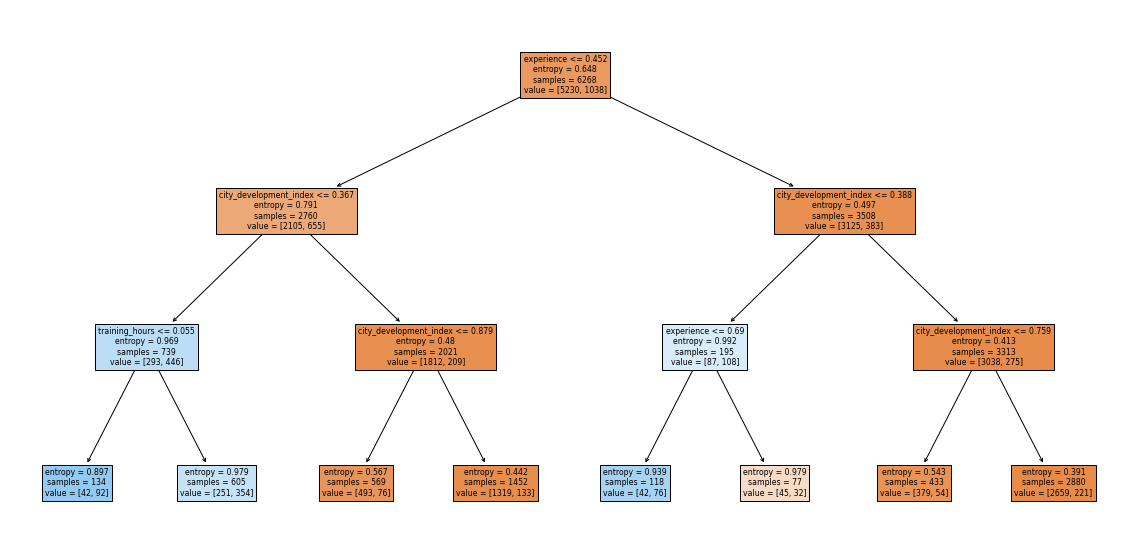

In [ ]:
# TODO
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns)
plt.show()

### 4.6 Initialize a new Decision Tree model, then use the best set of parameters from Step 4.3 to train it on the balanced train set that you prepared in Step 3.5.1. (3pt)

In [ ]:
# TODO
dt_model.set_params(criterion = 'entropy',max_depth= 3,max_features= 'auto',min_samples_split= 2)

dt_model.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       random_state=42)

### 4.7 Print the evaluation scores (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) from the training on balanced dataset. (3pt)

In [ ]:
# TODO
Y_pred = dt_model.predict(X_test)

# calculate and print the evaluation metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))

Accuracy: 0.8574618533680685
Precision: 0.572429906542056
Recall: 0.550561797752809
Confusion Matrix:
 [[2059  183]
 [ 200  245]]
F1 Score: 0.5612829324169532
ROC AUC Score: 0.7344691236756907


### 4.8 Discuss any difference between evaluation results from the unbalanced train set and balanced train set. (2pt)

During the training i find a major accuracy and better AUC score on the balanced data set. 

# 5. Random Forest Classifier (12pts total)

### 5.1 Use grid search to find best combinations of the following Random Forest parameters: n_estimators, max_depth, min_samples_split and min_samples_leaf. Use your own choice of scoring, criterion, number of folds for cross-validation for the model initialization. Remember the grid search can take a while to finish. (4pt)

In [ ]:
# TODO
from sklearn.ensemble import RandomForestClassifier

random_forest_clas = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1,2,3,5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scoring = 'accuracy'

grid_rf = GridSearchCV(
    estimator=random_forest_clas,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train, Y_train)

print("Best Parameters:", grid_rf.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### 5.2 Print the best combination of parameters and use it to train a Random Forest classifier model. (3pt)

In [ ]:
# TODO
print("Best Parameters:", grid_rf.best_params_)

random_forest_clas.set_params(max_depth = 5, min_samples_leaf = 1, min_samples_split = 2 , n_estimators = 50)

random_forest_clas.fit(X_train,Y_train)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

### 5.3  Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (5pt)

In [ ]:
# TODO
Y_pred = random_forest_clas.predict(X_test)

# calculate and print the evaluation metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))

Accuracy: 0.8552288797915891
Precision: 0.58
Recall: 0.45617977528089887
Confusion Matrix:
 [[2095  147]
 [ 242  203]]
F1 Score: 0.5106918238993711
ROC AUC Score: 0.6953066583808598


In [ ]:
# lets try with the balance data set
random_forest_clas.fit(x_train_bal,y_train_bal)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [ ]:
Y_pred = random_forest_clas.predict(X_test)

# calculate and print the evaluation metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))

Accuracy: 0.8500186081131373
Precision: 0.5464601769911505
Recall: 0.5550561797752809
Confusion Matrix:
 [[2037  205]
 [ 198  247]]
F1 Score: 0.5507246376811594
ROC AUC Score: 0.73180998105624


# 6. Boosting Classifier (20 pts total)

## 6.1 AdaBoost Classifier (10 pts total)

### 6.1.1 Perform a grid search for best values for parameters={n_estimators, learning_rate} of an AdaBoostClassifier and the given training set. (4pt) 

In [ ]:
# TODO
from sklearn.ensemble import AdaBoostClassifier

ada_class = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_ada = GridSearchCV(estimator=ada_class, param_grid=param_grid,scoring='precision')

grid_ada.fit(X_train, Y_train)
print("Best parameters: ", grid_ada.best_params_)
print("Best score: ", grid_ada.best_score_)

Best parameters:  {'learning_rate': 1.0, 'n_estimators': 100}
Best score:  0.60600752785599


### 6.1.2 Train an AdaboostClassifier using the best parameter set you found in step 6.1.1 (3pt) 

In [ ]:
# TODO
ada_class.set_params(learning_rate=1.0,n_estimators=100)
ada_class.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100)

### 6.1.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [ ]:
# TODO
Y_pred = ada_class.predict(X_test)

# calculate and print the evaluation metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))

Accuracy: 0.8533680684778564
Precision: 0.568733153638814
Recall: 0.47415730337078654
Confusion Matrix:
 [[2082  160]
 [ 234  211]]
F1 Score: 0.5171568627450981
ROC AUC Score: 0.7013962252803978


In [ ]:
# Lets test it with the balance data set

ada_class.fit(x_train_bal,y_train_bal)


AdaBoostClassifier(n_estimators=100)

In [ ]:
Y_pred = ada_class.predict(X_test)

# calculate and print the evaluation metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))

Accuracy: 0.8120580573129884
Precision: 0.4473684210526316
Recall: 0.5730337078651685
Confusion Matrix:
 [[1927  315]
 [ 190  255]]
F1 Score: 0.5024630541871922
ROC AUC Score: 0.7162670769477492


## 6.2 Gradient Boosting Classifier (10 pts total)

### 6.2.1 Perform a grid search for best values for parameters={n_estimators, max_depth, learning_rate} of a GradientBoostingClassifier and the given training set. (4pt)

In [ ]:
# TODO
from sklearn.ensemble import GradientBoostingClassifier

grad_desc_class = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_gb_clf = GridSearchCV(grad_desc_class, param_grid, cv=5, scoring='precision')

grid_gb_clf.fit(X_train, Y_train)
print(grid_gb_clf.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}


### 6.2.2 Train a GradientBoostingClassifier using the best parameter set you found in step 6.2.1 (3pt) 

In [ ]:
# TODOlearning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}

grad_desc_class.set_params(learning_rate=0.01,max_depth=4,n_estimators=100)
grad_desc_class.fit(X_train,Y_train)


GradientBoostingClassifier(learning_rate=0.01, max_depth=4)

### 6.2.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [ ]:
# TODO
Y_pred = grad_desc_class.predict(X_test)

# calculate and print the evaluation metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))

Accuracy: 0.8377372534425009
Precision: 0.6956521739130435
Recall: 0.035955056179775284
Confusion Matrix:
 [[2235    7]
 [ 429   16]]
F1 Score: 0.06837606837606838
ROC AUC Score: 0.5164164219346691


In [ ]:
# lets try it with the balance data

grad_desc_class.fit(x_train_bal,y_train_bal)

Y_pred = grad_desc_class.predict(X_test)

# calculate and print the evaluation metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))

Accuracy: 0.851135094901377
Precision: 0.550561797752809
Recall: 0.550561797752809
Confusion Matrix:
 [[2042  200]
 [ 200  245]]
F1 Score: 0.550561797752809
ROC AUC Score: 0.73067786587016


# 7. Summary Discussion (4 pts)

\Which model yields the highest precision?

By far the Gradient Descent boosting Classifier is the best presicion with 69%

Which model yields the lowest recall? 

The lowest recall was 0.035 with Gradient Descent

Which model yields the higest True Positive (TP)? 

Gradient descent with 2235 TP

Which model yields the best performance overall? 

Gradient Descent is the best performing overall